# **SOCCER DATA**
This dataset contains data of every game from the 2018-2019 season in the English Premier League.

In [ ]:
!pip install calendar

In [3]:
import pandas as pd

pd.read_csv("Data/soccer18-19.csv")

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12/5/19,Liverpool,Wolves,2,0,H,1,0,H,...,5,2,3,11,4,1,0,2,0,0
376,E0,12/5/19,Man United,Cardiff,0,2,A,0,1,A,...,10,4,9,6,11,2,3,3,0,0
377,E0,12/5/19,Southampton,Huddersfield,1,1,D,1,0,H,...,3,3,8,6,4,3,0,1,0,0
378,E0,12/5/19,Tottenham,Everton,2,2,D,1,0,H,...,3,9,10,13,7,4,0,2,0,0


## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

In [13]:
data = pd.read_csv("Data/soccer18-19.csv")

## **TEAM WITH THE MOST FOULS**

First, I will confirm that there are no missing values in the 'HomeTeam' and 'AwayTeam' features

In [14]:
data[['HomeTeam','AwayTeam']].isna().sum()

,0
HomeTeam,0
AwayTeam,0


No missing values. Now, which HomeTeam committed the most fouls? The table below answers this question with teams with the most fouls at the top

In [16]:
home_team = data.groupby(['HomeTeam'], as_index=False)['HF'].sum().sort_values('HF',ascending=False)
home_team

,HomeTeam,HF
2,Brighton,221
17,Watford,221
15,Southampton,219
0,Arsenal,218
7,Everton,218
9,Huddersfield,214
13,Man United,213
14,Newcastle,203
8,Fulham,199
19,Wolves,198


Brighton and Watford commits a lot of fouls. WOW. As a football fan, I'm surprised to see Arsenal this high on the foul taable.

I do same for the away team

In [18]:
away_team = data.groupby(['AwayTeam'],as_index=False)['AF'].sum().sort_values('AF',ascending=False)
away_team

,AwayTeam,AF
2,Brighton,242
8,Fulham,224
13,Man United,220
14,Newcastle,219
7,Everton,214
17,Watford,212
19,Wolves,211
9,Huddersfield,206
6,Crystal Palace,206
16,Tottenham,201


Brighton really doesn't care if they are at home or away, they just want to 'break legs'

I will merge the two tables to get the total fouls by each team

In [19]:
away_home_team_foul = pd.merge(home_team, away_team, left_on='HomeTeam',right_on='AwayTeam')
away_home_team_foul['Total_Foul'] = away_home_team_foul['HF'] + away_home_team_foul['AF']
away_home_team_foul_5 = away_home_team_foul.head(5)
away_home_team_foul_5

,HomeTeam,HF,AwayTeam,AF,Total_Foul
0,Brighton,221,Brighton,242,463
1,Watford,221,Watford,212,433
2,Southampton,219,Southampton,201,420
3,Arsenal,218,Arsenal,194,412
4,Everton,218,Everton,214,432


The top 5 teams with the most fouls

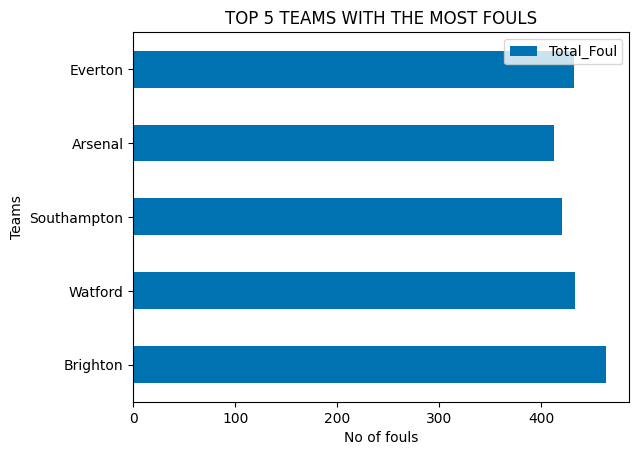

In [21]:
away_home_team_foul_5.plot(kind='barh', y='Total_Foul', x='HomeTeam',xlabel = 'No of fouls',ylabel='Teams',color='#0072B2').set_title('TOP 5 TEAMS WITH THE MOST FOULS')

plt.show()

## **Plot the percentage of games that ended in a draw over time.**


In [25]:
#convert the date column to date datatype and check the info
data['Date'] = pd.to_datetime(data['Date'], format="%m/%d/%Y")
games_time = data[['FTR','Date']].copy()
games_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FTR     380 non-null    object        
 1   Date    380 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 6.1+ KB


Number of home,away win and draw games for each month

In [37]:
#
games_time['Month'] = games_time['Date'].dt.month
games_result_month = games_time.groupby('Month', as_index=False)['FTR'].value_counts()
games_result_month.head()

,Month,FTR,count
0,1,H,23
1,1,A,11
2,1,D,7
3,2,H,26
4,2,A,12


Visuals?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

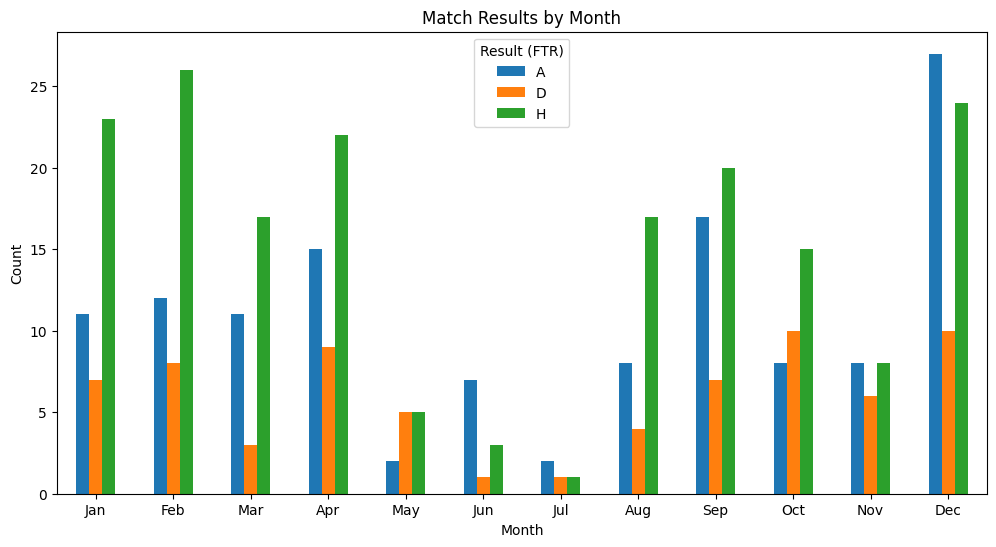

In [39]:
games_result_month_game = games_time.groupby(['Month','FTR']).size().reset_index(name='count')

pivot_table = games_result_month_game.pivot(index='Month', columns='FTR', values='count').fillna(0)

pivot_table.index = pivot_table.index.map(lambda x: calendar.month_abbr[x])

pivot_table.plot(kind='bar', figsize=(12,6))

plt.title("Match Results by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title="Result (FTR)")
plt.xticks(rotation=0)

May, June and July have little number of games. This makes sense as this is where season ends.

Number of games that ended in a draw for each month?

In [40]:
drawn_games = games_result_month[games_result_month['FTR'] == 'D'].reset_index(drop=True)
drawn_games

,Month,FTR,count
0,1,D,7
1,2,D,8
2,3,D,3
3,4,D,9
4,5,D,5
5,6,D,1
6,7,D,1
7,8,D,4
8,9,D,7
9,10,D,10


Games in December and October have the most draw

A plot of percentage of games that ended in a draw over the season in each month

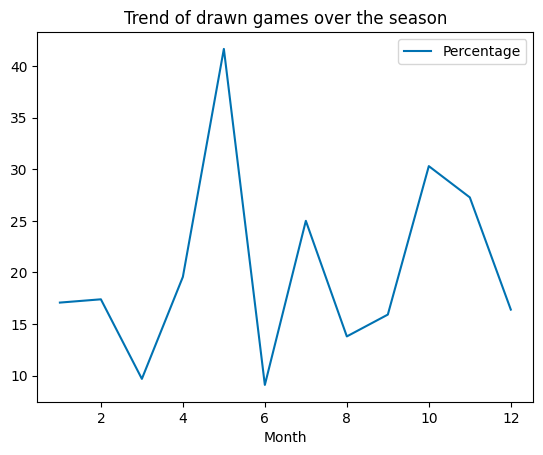

In [41]:
games_time_month = games_time.groupby('Month', as_index=False)['FTR'].count().rename(columns={'FTR':'Total_result'})
games_time_month = games_time_month.join(drawn_games['count']).rename(columns={'count':'drawn_results'})

games_time_month['Percentage'] = (games_time_month['drawn_results']/games_time_month['Total_result'])*100

games_time_month.plot(kind='line', x='Month',y='Percentage',color='#0072B2').set_title('Trend of drawn games over the season')
plt.show()

## **Does the number of red cards a team receives have an effect on its probability of winning a game?**

As a football fan, I already know that red card affects the outcome of a match a lot, but I will check what the data tells

In [31]:
data_u = data[['HomeTeam','AwayTeam','FTHG','FTAG','HTHG','HTAG','FTR','HTR','HS','AS','HR','AR']]

In [35]:
num_home = data[['HR','FTR']].groupby(['HR']).value_counts(normalize=True).reset_index(name='Count')
num_home

,HR,FTR,Count
0,0,H,0.488950
1,0,A,0.320442
2,0,D,0.190608
3,1,A,0.666667
4,1,H,0.222222
5,1,D,0.111111


The table above shows the percentage of games that home or away won and when it was a draw.

Visualizing will make it easier to understand

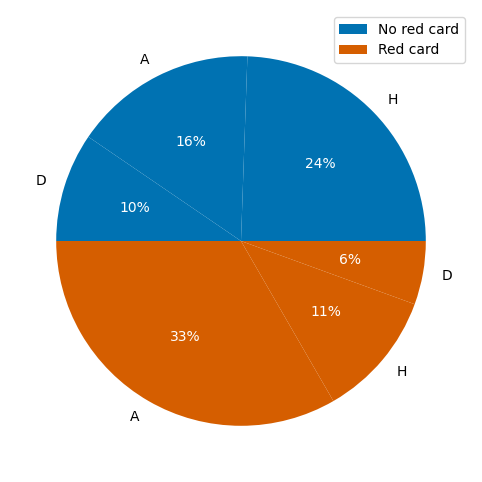

In [43]:
from matplotlib.patches import Patch

colour_dict = ['#0072B2', '#D55E00']

#create pie chart
fig, ax = plt.subplots(figsize=(9, 6))

_, _, autotext = plt.pie(num_home['Count'], labels=num_home['FTR'], colors=num_home['HR'].replace({0:'#0072B2',1:'#D55E00'}), autopct='%.0f%%')

for i in autotext:
    i.set_color('white')

plt.legend(
    [
        Patch(facecolor=colour_dict[0]),
        Patch(facecolor=colour_dict[1])
    ], ["No red card", "Red card"], loc = 'upper right'
)

plt.show()

Away team wins about 33% of the time when Home team gets a red card. Home team wins only 11%.

I will check the total number of games from the full dataset that ends with home or away team victory or a draw>

<Axes: xlabel='HR', ylabel='count'>

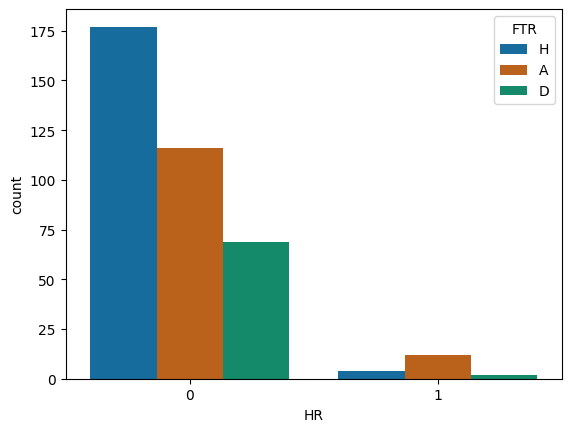

In [56]:
sns.countplot(data=data,  x='HR', hue='FTR',palette=['#0072B2','#D55E00','#009E73'])


Time to check how it looks when away teams are the ones with the red card

In [50]:
#manipulate to have figures for all red cards represented by 1 in the AR column
num_away = data[['AR','FTR']].groupby(['AR']).value_counts(normalize=True).reset_index(name='Count')
num_away



,AR,FTR,Count
0,0,H,0.474432
1,0,A,0.343750
2,0,D,0.181818
3,1,H,0.481481
4,1,A,0.259259
5,1,D,0.259259
6,2,H,1.000000


The result shows that there was a game where the away team got 2 red cards. I"m not interested in the number of red cards in this analysis. I just want to know if the team was red carded or not. So I have to manipulate the data and give 1 to signify a team was red carded

In [51]:
num_away = data[['AR','FTR']].copy()
num_away['AR'] = num_away['AR'].apply(lambda x: 1 if x > 0 else 0)
num_away = num_away.groupby(['AR']).value_counts(normalize=True).reset_index(name='Count')
num_away

,AR,FTR,Count
0,0,H,0.474432
1,0,A,0.343750
2,0,D,0.181818
3,1,H,0.500000
4,1,A,0.250000
5,1,D,0.250000


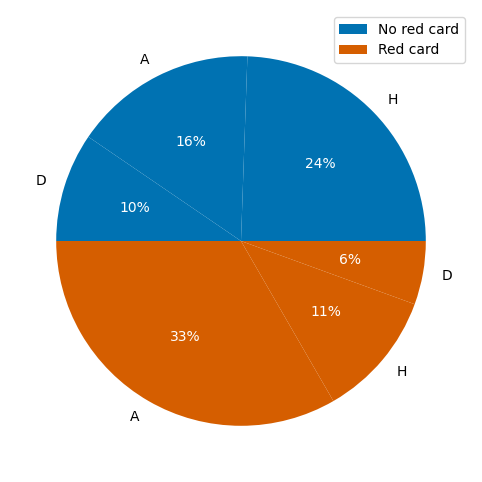

In [53]:
colour_dict = ['#0072B2', '#D55E00']

fig, ax = plt.subplots(figsize=(9, 6))

_, _, autotext = plt.pie(num_home['Count'], labels=num_home['FTR'], colors=num_home['HR'].replace({0:'#0072B2',1:'#D55E00'}), autopct='%.0f%%')

for i in autotext:
    i.set_color('white')

plt.legend(
    [
        Patch(facecolor=colour_dict[0]),
        Patch(facecolor=colour_dict[1])
    ], ["No red card", "Red card"], loc = 'upper right'
)

plt.show()

As expected, the pie chart is the same. The data is symmetrical.

<Axes: xlabel='AR', ylabel='count'>

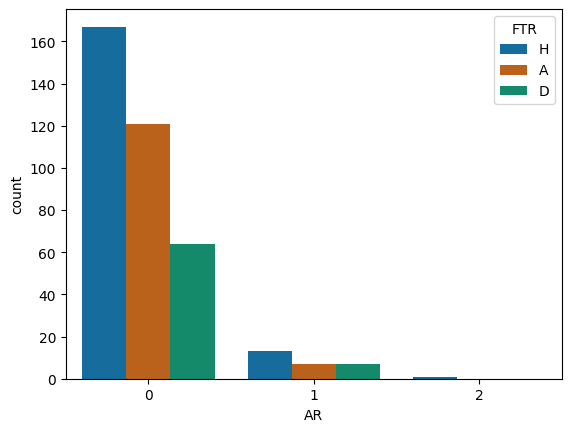

In [55]:
sns.countplot(data=data,  x='AR', hue='FTR',palette=['#0072B2','#D55E00','#009E73'])


The two plots above shows that the opposite teams have higher probability of winning in the case of a red card.

But, is there a significant difference in the number of win rates for opposite team in the case of a red card?

In [60]:
data_red_half = data_u[['FTR','HR','AR']]
data_red_half.head()

,FTR,HR,AR
0,H,0,0
1,H,0,0
2,A,0,0
3,A,0,0
4,A,0,0


In [61]:
import pingouin as pg
observed_manual = pd.crosstab(index=data_red_half["FTR"], columns=data_red_half["HR"],margins=False)
expected, observed_pingouin, stats = pg.chi2_independence(data_red_half, x='HR', y='FTR')

print(observed_manual)
print(" ")
print(observed_pingouin)

HR     0   1
FTR         
A    116  12
D     69   2
H    177   4
 
FTR    A   D    H
HR               
0    116  69  177
1     12   2    4


/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


In [62]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  9.243378  2.0  0.009836  0.155964  0.782314
1        cressie-read  0.666667  8.965216  2.0  0.011304  0.153599  0.768980
2      log-likelihood  0.000000  8.647475  2.0  0.013250  0.150853  0.752952
3       freeman-tukey -0.500000  8.607176  2.0  0.013520  0.150501  0.750857
4  mod-log-likelihood -1.000000  8.735870  2.0  0.012677  0.151622  0.757498
5              neyman -2.000000  9.544881  2.0  0.008460  0.158487  0.796049


In [63]:
observed_manual = pd.crosstab(index=data_red_half["FTR"], columns=data_red_half["AR"],margins=False)
expected, observed_pingouin, stats = pg.chi2_independence(data_red_half, x='FTR', y='AR',correction=True)

print(observed_manual)
print(" ")
print(observed_pingouin)

AR     0   1  2
FTR            
A    121   7  0
D     64   7  0
H    167  13  1
 
AR     0   1  2
FTR            
A    121   7  0
D     64   7  0
H    167  13  1


/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7409: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_stats_py.py:7406: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [64]:
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  2.441298  4.0  0.655177  0.056677  0.119275
1        cressie-read  0.666667  2.477515  4.0  0.648667  0.057095  0.120428
2      log-likelihood  0.000000  2.784846  4.0  0.594451  0.060533  0.130338
3       freeman-tukey -0.500000       NaN  4.0       NaN       NaN       NaN
4  mod-log-likelihood -1.000000       inf  4.0  0.000000       inf       NaN
5              neyman -2.000000       NaN  4.0       NaN       NaN       NaN


From the results of the chi2 test of independence, we can conclude that there is a statistical significance of a home team win being affected in the case of a red card and no significance when the away team gets a red card.

## **I wonder, how many games ended as a lost/draw after winning by half time for the home team?**

In [65]:
data_u_hl = data_u[(data_u['HTR'] == 'H') & (data_u['FTR'] == 'A')]
data_u_hl = data_u_hl.groupby('HomeTeam')['FTR'].value_counts()
data_u_hl

,,count
HomeTeam,FTR,
Crystal Palace,A,1
Fulham,A,1
Tottenham,A,1
West Ham,A,1


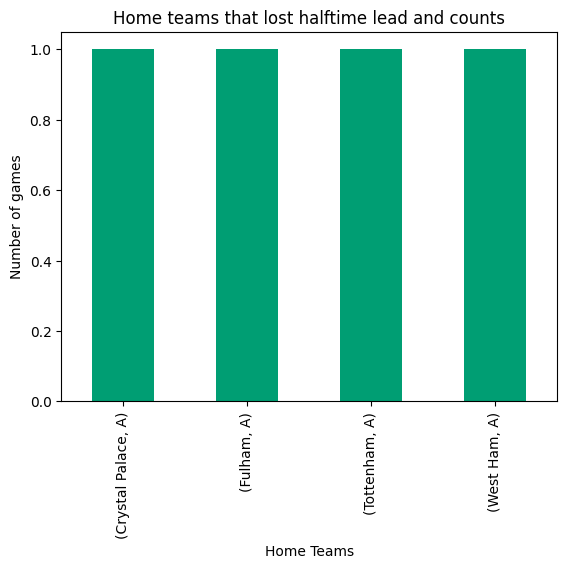

In [67]:
data_u_hl.plot(kind='bar', x='HomeTeam', y='Count', color='#009E73')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Home teams that lost halftime lead and counts')
plt.xlabel('Home Teams')
plt.ylabel('Number of games')
plt.show()


The chart above shows team that were leading in the first half but ended up losing the match in the second half.

I will add draw to the mix; teams that won first half but lost the match or it ended in a draw

In [69]:
data_u_hld = data_u[(data_u['HTR'] == 'H') & ((data_u['FTR'] == 'A') | (data_u['FTR'] == 'D'))]
data_u_hld = data_u_hld.groupby(['HomeTeam'])['FTR'].value_counts().reset_index(name='Count')
data_u_hld

,HomeTeam,FTR,Count
0,Arsenal,D,1
1,Bournemouth,D,1
2,Brighton,D,1
3,Burnley,D,1
4,Chelsea,D,2
5,Crystal Palace,A,1
6,Crystal Palace,D,1
7,Everton,D,1
8,Fulham,A,1
9,Fulham,D,1


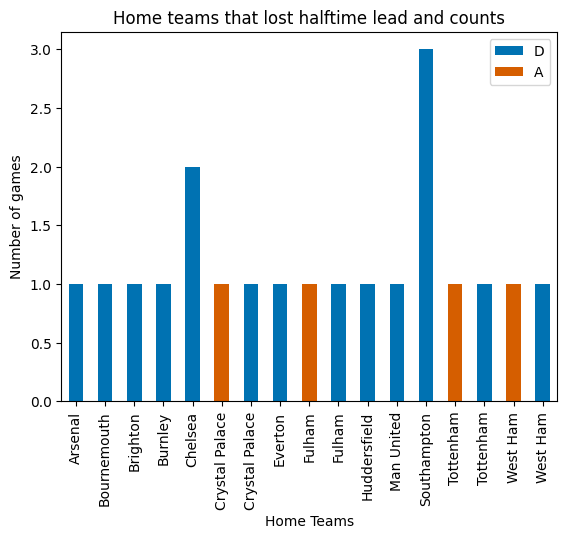

In [74]:
from matplotlib.patches import Patch

colour_dict = ['#0072B2', '#D55E00', '#009E73']
data_u_hld.plot(kind='bar', x='HomeTeam', y='Count', color=data_u_hld['FTR'].replace({'D':'#0072B2','A':'#D55E00'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Home teams that lost halftime lead and counts')
plt.xlabel('Home Teams')
plt.ylabel('Number of games')
plt.legend(
    [
        Patch(facecolor=colour_dict[0]),
        Patch(facecolor=colour_dict[1])
    ], ["D", "A"]
)
plt.show()

Chelsea has lost a lead in the first to end a draw twice, southampton, thrice. Crystal palace, fulham, tottenham and west ham all had 1 game where they lost after leading in the first half

## How about the away team?

In [75]:
data_u_ald = data_u[(data_u['HTR'] == 'A') & ((data_u['FTR'] == 'H') | (data_u['FTR'] == 'D'))]
data_u_ald = data_u_ald.groupby(['AwayTeam'])[['FTR','HTR']].value_counts().reset_index(name='Count')
data_u_ald

,AwayTeam,FTR,HTR,Count
0,Arsenal,D,A,1
1,Bournemouth,D,A,1
2,Brighton,H,A,1
3,Chelsea,H,A,1
4,Crystal Palace,H,A,2
5,Crystal Palace,D,A,1
6,Everton,H,A,1
7,Fulham,D,A,1
8,Huddersfield,H,A,1
9,Man City,H,A,1


/tmp/ipython-input-3137758270.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


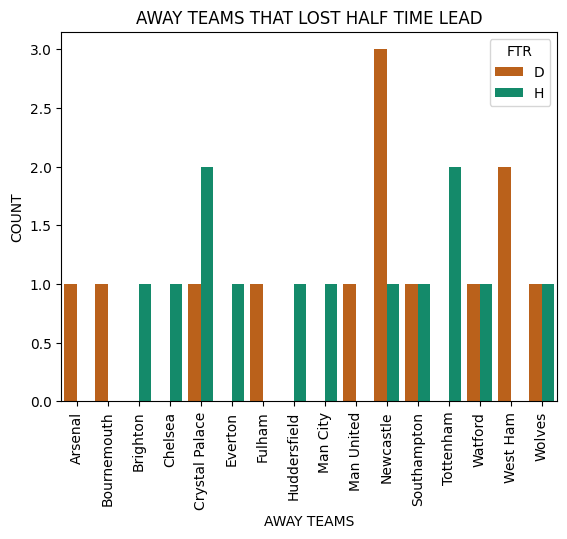

In [76]:
ax = sns.barplot(data=data_u_ald,x='AwayTeam',y='Count',hue='FTR',palette=['#D55E00','#009E73'])
ax.set_title('AWAY TEAMS THAT LOST HALF TIME LEAD')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('AWAY TEAMS')
ax.set_ylabel('COUNT')
plt.show()


## **REFEREES? TIME TO SEE WHAT THE DATA TELLS ABOUT THE REFEREES**

How many red cards have they given the home and away teams?

In [77]:
data_u_referee_HR = data.groupby('Referee')['HR'].value_counts().reset_index(name='count')
data_u_referee_AR = data.groupby('Referee')['AR'].value_counts().reset_index(name='count')
data_u_referee_AR

,Referee,AR,count
0,A Madley,0,2
1,A Marriner,0,26
2,A Marriner,1,1
3,A Taylor,0,31
4,A Taylor,1,1
5,C Kavanagh,0,23
6,C Kavanagh,1,1
7,C Pawson,0,21
8,C Pawson,1,4
9,C Pawson,2,1


Table shows the number of red card each referee has given the away team.

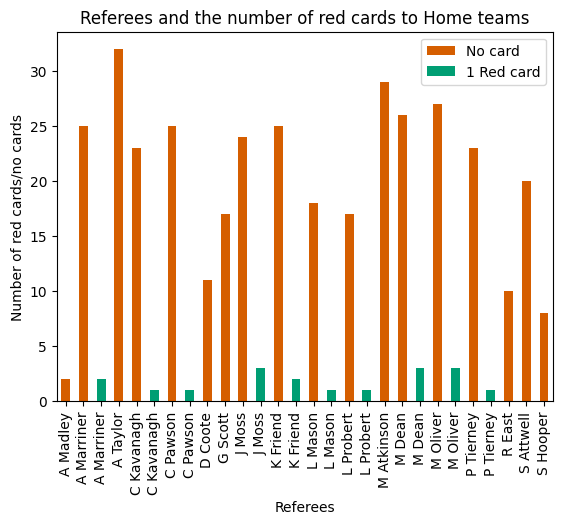

In [78]:
colour_dict = ['#D55E00', '#009E73']
data_u_referee_HR.plot(kind='bar', x='Referee', y='count', color=data_u_referee_HR['HR'].replace({0:'#D55E00',1:'#009E73'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Referees and the number of red cards to Home teams')
plt.xlabel('Referees')
plt.ylabel('Number of red cards/no cards')
plt.legend(
    [
        Patch(facecolor=colour_dict[0]),
        Patch(facecolor=colour_dict[1])
    ], ["No card", "1 Red card"]
)
plt.show()

None of the Referees gave more than 1 red card to the Home team for the season.

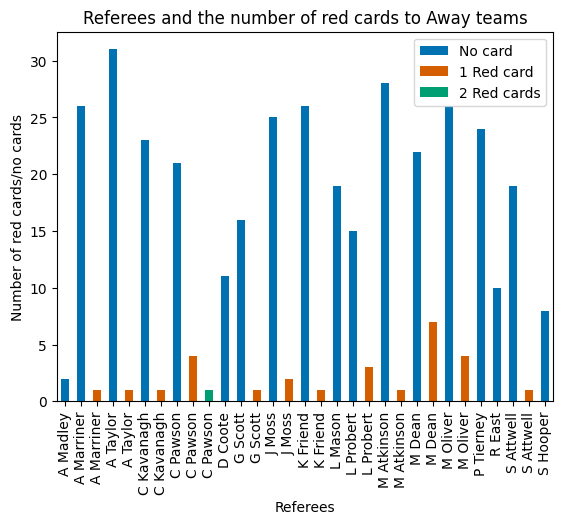

In [82]:
colour_dict = ['#0072B2', '#D55E00', '#009E73']
data_u_referee_AR.plot(kind='bar', x='Referee', y='count', color=data_u_referee_AR['AR'].replace({0:'#0072B2',1:'#D55E00',2:'#009E73'}))
plt.xticks(rotation=90, horizontalalignment="center")
plt.title('Referees and the number of red cards to Away teams')
plt.xlabel('Referees')
plt.ylabel('Number of red cards/no cards')
plt.legend(
    [
        Patch(facecolor=colour_dict[0]),
        Patch(facecolor=colour_dict[1]),
        Patch(facecolor=colour_dict[2])
    ], ["No card", "1 Red card","2 Red cards"]
)
plt.show()

C Pawson is the ony referee that gave more than 1 red card to any of the teams and it was to an away team.

Checking total red cards they referees have given to teams.

In [83]:
data_u_ref_red = data[['Referee','HR','AR']]
data_u_ref_red = data.groupby(['Referee'])['Referee'].count().reset_index(name='c')
data_u_ref_red

,Referee,c
0,A Madley,2
1,A Marriner,27
2,A Taylor,32
3,C Kavanagh,24
4,C Pawson,26
5,D Coote,11
6,G Scott,17
7,J Moss,27
8,K Friend,27
9,L Mason,19


/tmp/ipython-input-2215117191.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Referee',y='c',data=data_u_ref_red,palette='rocket',order=data_u_ref_red.sort_values('c').Referee)
/tmp/ipython-input-2215117191.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


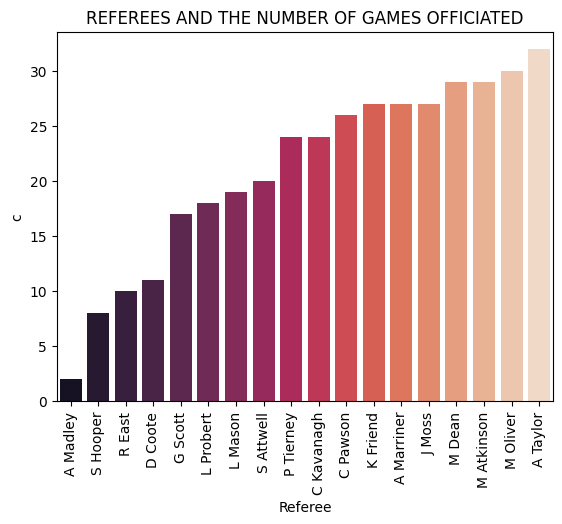

In [84]:
ax = sns.barplot(x='Referee',y='c',data=data_u_ref_red,palette='rocket',order=data_u_ref_red.sort_values('c').Referee)
ax.set_title('REFEREES AND THE NUMBER OF GAMES OFFICIATED')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

I'm creating new features for the purpose of the ML models I will be training

In [85]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,Month,Day
0,E0,2018-10-08,Man United,Leicester,2,1,H,1,0,H,...,11,8,2,5,2,1,0,0,10,8
1,E0,2018-11-08,Bournemouth,Cardiff,2,0,H,1,0,H,...,11,9,7,4,1,1,0,0,11,8
2,E0,2018-11-08,Fulham,Crystal Palace,0,2,A,0,1,A,...,9,11,5,5,1,2,0,0,11,8
3,E0,2018-11-08,Huddersfield,Chelsea,0,3,A,0,2,A,...,9,8,2,5,2,1,0,0,11,8
4,E0,2018-11-08,Newcastle,Tottenham,1,2,A,1,2,A,...,11,12,3,5,2,2,0,0,11,8


## Can we predict the final result of matches based on the data we have?

We will use Random forest and Gradient boost classifiers with Randomised and Grid search, just to see how their performance differs

In [86]:
#prepare date into predictor features and target feature

X = data.drop(['Date','Div','FTR'],axis=1)
X = pd.get_dummies(X,drop_first=True).values
y = data['FTR'].values

In [87]:
#import required packages

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV

In [88]:
#split data into training and testing set

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=2121)

In [96]:
#instantiate models

GB = GradientBoostingClassifier()
RF   = RandomForestClassifier()

#define parameters for both models

param_grid = {'n_estimators': np.arange(80,130,2),
               'max_features': [ 'sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2],
               'bootstrap': [True, False]
             }

param_grids = {'n_estimators': np.arange(80,130,2),
               'max_features': [ 'sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2]
             }


In [98]:
#define function for the random forest model

def models_RF(classifier, param,X,y):
    RSC_rf = RandomizedSearchCV(classifier, param_distributions  = param_grid, cv = 5, n_jobs=1)
    GSC_rf = GridSearchCV(classifier, param_grid=param_grid, cv = 5, n_jobs=1)

    RSC_rf = RSC_rf.fit(X,y)
    GSC_rf = GSC_rf.fit(X,y)
    return RSC_rf, GSC_rf

#define function for the gradient boosting model

def models_GB(classifier, param,X,y):
    RSC_gb = RandomizedSearchCV(classifier, param_distributions  = param_grids, cv = 5, n_jobs=1)
    GSC_gb = GridSearchCV(classifier, param_grid=param_grids, cv = 5, n_jobs=1)

    RSC_gb = RSC_gb.fit(X,y)
    GSC_gb = GSC_gb.fit(X,y)

    return RSC_gb, GSC_gb

In [99]:
#instantiate models

RandomF_results = models_RF(RF, param_grid,X_train, y_train)
GradientB_results = models_GB(GB, param_grid,X_train, y_train)

#select the various instances

RandomF_results_randomized = RandomF_results[0]
RandomF_results_grid = RandomF_results[1]

GradientB_results_randomized = GradientB_results[0]
GradientB_results_grid = GradientB_results[1]


In [104]:
print('Random Forest (RandomSearchCV) - Best Params:', RandomF_results_randomized.best_params_)
print('Random Forest (RandomSearchCV) - Best Score:', RandomF_results_randomized.best_score_)

print('Random Forest (GridSearchCV) - Best Params:', RandomF_results_grid.best_params_)
print('Random Forest (GridSearchCV) - Best Score:', RandomF_results_grid.best_score_)

print('Gradient Boosting (RandomSearchCV) - Best Params:', GradientB_results_randomized.best_params_)
print('Gradient Boosting (RandomSearchCV) - Best Score:', GradientB_results_randomized.best_score_)

print('Gradient Boosting (GridSearchCV) - Best Params:', GradientB_results_grid.best_params_)
print('Gradient Boosting (GridSearchCV) - Best Score:', GradientB_results_grid.best_score_)


Random Forest (RandomSearchCV) - Best Params: {'n_estimators': np.int64(120), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}
Random Forest (RandomSearchCV) - Best Score: 0.6546448087431693
Random Forest (GridSearchCV) - Best Params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': np.int64(80)}
Random Forest (GridSearchCV) - Best Score: 0.6546448087431693
Gradient Boosting (RandomSearchCV) - Best Params: {'n_estimators': np.int64(128), 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': None}
Gradient Boosting (RandomSearchCV) - Best Score: 0.6546448087431693
Gradient Boosting (GridSearchCV) - Best Params: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': np.int64(80)}
Gradient Boosting (GridSearchCV) - Best Score: 0.6546448087431693


The Random Forest Classifier used as base model for RandomSearchCV has the lowest scores.

## **To predict outcome of game by results at halftime, however**


In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

y = LabelEncoder().fit_transform(data['FTR'])
X = LabelEncoder().fit_transform(data['HTR'])

X_train, X_test, y_train,y_test = train_test_split(X.reshape(-1,1),y,test_size=0.2,stratify = y,random_state=2121)
LR = LogisticRegression().fit(X_train,y_train)
y_pred = LR.predict(X_test)

print('Our model gives an accuracy score of: ', accuracy_score(y_test, y_pred))

Our model gives an accuracy score of:  0.6447368421052632


WIll Random forest model with parameter tuning give better accuracy?

In [102]:
RF   = RandomForestClassifier()

#define parameters for both models

param_grid = {'n_estimators': np.arange(80,130,2),
               'max_features': ['sqrt', 'log2',None],
               'min_samples_split': [2,6],
               'min_samples_leaf': [1,2],
               'bootstrap': [True, False]
             }

# RSC_rf = RandomizedSearchCV(classifier, param_distributions  = param_grid, cv = 5, n_jobs=1)
GSC_rf = GridSearchCV(RF, param_grid=param_grid, cv = 5, n_jobs=1)

# RSC_rf = RSC_rf.fit(X,y)
GSC_rf = GSC_rf.fit(X_train,y_train)
y_pred = GSC_rf.predict(X_test)

print('Our model gives an accuracy score of: ', accuracy_score(y_test, y_pred))

Our model gives an accuracy score of:  0.6447368421052632


# REPORT

I performed data cleaning, exploration, analysing and visualisation of the dataset. Some of the insights I got from the datset includes;
- Teams that lost half time leads
- Referees with the most number of red cards
- Red cards affects the win probability of the teams

The manager can predict the full-time result with about 66% confidence.

I recommend that the model be deployed to improve the management of the squad by the manager. A proper pipeline should be used that facilitate  introduction of new data to enhance the model. I also recommend that more features(factors) be considered when trying to predict the outcome of a match, such as red cards, injury to certain players, faqitue level of the players, expected goals. Including these features will improve the accuracy of the model and gives the manager better confidence when deciding to give young players some minutes. Finally, proper maintenance of the model is deployed.